<h1><center> Frontal Low-Level Jet analysis  </center></h1>
<div style="text-align: center"> 
    Dr. Harish Baki <br/> Postdoctoral researcher <br/> TU Delft, Netherlands <br/> Email: h.baki@tudelft.nl<br/>
</div>

In [2]:
# print current date
import datetime
print(f'Updated: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')

Updated: 2024-05-01 18:30:39


In [3]:
import xarray as xr
import os
import glob
import dask.distributed as dd
import dask
import dask.array as da
import time
import sys
import calendar
from datetime import datetime, timedelta
import numpy as np
import wrf
from itertools import product

import wrf
from wrf import interplevel

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['text.usetex'] = False

import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy
from cartopy import crs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

from windrose import WindroseAxes

from scipy.stats import weibull_min

import seaborn as sns
import seaborn.objects as so

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator

from scipy.stats import linregress


from meteostat import Stations
from datetime import datetime
from meteostat import Hourly

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture
from sklearn.covariance import EllipticEnvelope

root_dir = '/media/harish/SSD_4TB/EU_SCORES_project/WRFV4.4/FLLJ/'
scripts_dir = f'{root_dir}/scripts'
sys.path.append(scripts_dir)

from data_processing.libraries import *

In [29]:
client.close()
cluster.close()

In [4]:
import dask.distributed as dd
cluster = dd.LocalCluster(n_workers=24, threads_per_worker=2, memory_limit='2GB',dashboard_address=f':22522')
client = dd.Client(cluster)
print(client)

<Client: 'tcp://127.0.0.1:39079' processes=24 threads=48, memory=44.70 GiB>


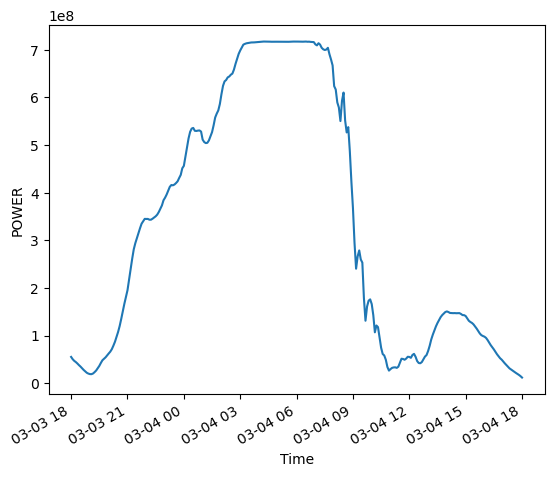

In [54]:
case = 2
case_dir = f'FLLJ_{case}'
run = 1
run_dir = f'WRF_run_{run}'
files = glob.glob(f'{root_dir}/{case_dir}/{run_dir}/turbine_power.nc')
ds = xr.open_dataset(files[0])
ds.POWER.plot()